<center><h2>Support Vector Machines (SVM)</h2></center>

<center><img src="images/support_svm.png" width="50%"/></center>

<center><h2>Support Vector Machines (SVM) to resolve roommate conflict</h2></center>
<center><img src="images/roommate.jpg" width="70%"/></center>

When I was a student in SF, I had to share a room with a roommate. 

It was huge room and our stuff was all over the floor. We too lazy to pick the stuff up. But we wanted seperation of items.

Our solution was to separate our stuff but all we had was a straight room divider.

We could the divider anywhere, we decided it was most fair to put in the middle of our stuff.

<center><img src="images/panel_divider.jpg" width="55%"/></center>

By The End Of This Session You Should Be Able To:
----

- Explain Support Vector Machines (SVM) in your own words.
- Fit and interpret a SVM to data.
- Find the support vectors for a SVM.
- Explain the concept of decision boundaries in your own words.

SVM defined
-----

A supervised machine learning algorithm that learns how to separate groups.

In [45]:
reset -fs

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

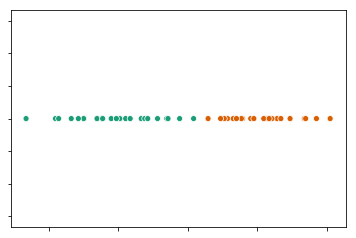

In [47]:
from sklearn.datasets.samples_generator import make_blobs

# 1 dimensional data with 2 classes
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.25)
ax = sns.scatterplot(x=X[:,0], y=np.ones(X.shape[0]), hue=y, palette=palette,  legend=False);
ax.set_yticklabels(''); ax.set_xticklabels('');

How would you separate these two groups 1 dimension?

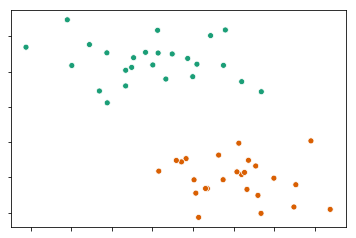

In [88]:
# Let's jump to 2 dimensions
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
ax = sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y, palette=palette,  legend=False);
ax.set_yticklabels(''); ax.set_xticklabels('');

How would you separate these groups in 2 dimensions?

How decision boundaries scale with dimensionality?
------

A point / scalar in 1 dimension.

A line (or a curve) in 2 dimensions.

A `________` in higher dimensions.

A __hyperplane (or a manifold)__ in higher dimensions.

SVMs learn a decision bound
----

<center><img src="images/discriminative.png" width="40%"/></center>

Find a boundary that divides the classes from each other (training).

Use that boundary to predict class membership for new data (inference).

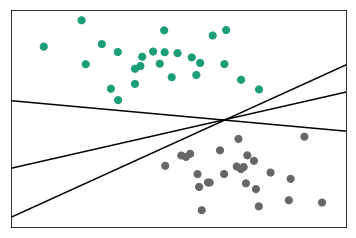

In [86]:
# There are infinite linear bounds allow for perfect separation

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=palette)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5); plt.gca().axes.get_xaxis().set_ticks([]); plt.gca().axes.get_yaxis().set_ticks([]);

SVM: The "Margin"
-----

Rather than drawing a zero-width line between the classes,  
draw a margin around each line of some width.

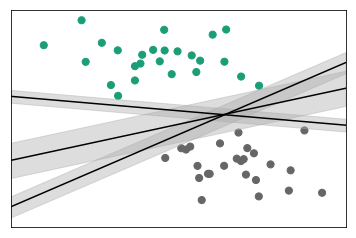

In [50]:
# Plot linear bounds with margins
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=palette)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, 
                     edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5); plt.gca().axes.get_xaxis().set_ticks([]); plt.gca().axes.get_yaxis().set_ticks([]);

SVM: Maximize The Margin
-----

<center><img src="images/max_margin.png" width="700"/></center>

The margin is up to the nearest point of each class.

<center><img src="images/small_margin.gif" width="90%"/></center>

Support Vector Machines (SVM): Find the Support Vectors
-----

<center><img src="images/margin.png" width="50%"/></center>

A SVM solution only depends on the Support Vectors. __Not__ on the whole data set.

<center><h2>What did one Support Vector say to another? </h2></center>

<center><h2>I feel so marginalized. 😹😹😹</h2></center>

SVM (re)defined 
-----

~~A machine learning algorithm that discovers how to separate classes of data.~~

__Find the optimal hyperplane that maximums the margin between support vectors__.

<center><h2>Toy Example of SVM : What is in the box?</h2></center>
<center><img src="images/Mystery_Box.jpg" width="60%"/></center>


In [89]:
# Make the data
X, y = make_blobs(n_samples=20, centers=2, cluster_std=0.25, center_box=[0, 2], random_state=42)
X *= 10
X = np.round(X)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=palette);

In [94]:
# Size of the objects
print(*zip(X[:6], y[:6]), sep="\n")

(array([11., 21.]), 0)
(array([ 3., 18.]), 0)
(array([ 6., 20.]), 0)
(array([14., 11.]), 1)
(array([ 6., 18.]), 0)
(array([15.,  7.]), 1)


Always visually inspect the data first
------

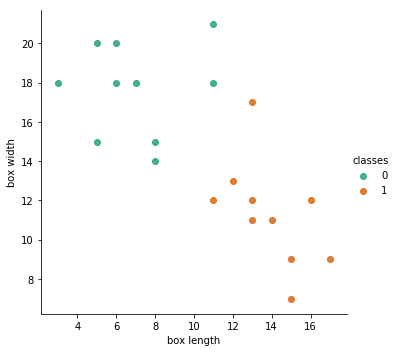

In [95]:
# Munge data into Pandas dataframe for easier ploting
df = pd.DataFrame(X, columns=['box length', 'box width']); df['classes'] = y

item_plot = sns.lmplot(data=df, x='box length', y='box width',
                      fit_reg=False, hue="classes", legend=True, palette=palette);

Fit SVM
-----

In [79]:
from sklearn.svm import SVC

In [80]:
# Define an instance of a SVM classifer
clf = SVC(kernel='linear')

In [81]:
# Estimate the classifer for our data
clf.fit(X, y);

After being fitted, the model can then be used to predict new values:

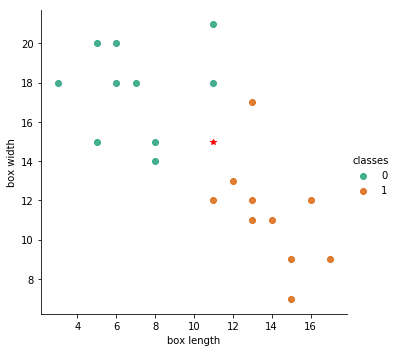

In [110]:
# value = [9, 17]  # New data point #1
value = [11, 15] # New data point #2 

# Plot 
new_item_plot = sns.lmplot(data=df, x='box length', y='box width', fit_reg=False, hue="classes", legend=True, palette=palette);
new_item_plot.ax.plot(value[0], value[1], color='red', marker='*');

In [111]:
# Predict
print(f"Predicted cagetory: {clf.predict([value]).item()}")

Predicted cagetory: 1


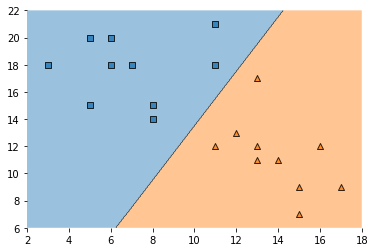

In [112]:
# Plot the decision bounds
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, 
                      y=y, 
                      clf=clf,
                      legend=False);

Check for understanding
-------

What are the support vectors in this example?

In [113]:
# Get support vectors
clf.support_vectors_

array([[11., 18.],
       [13., 17.]])

Reference: http://scikit-learn.org/stable/modules/svm.html

Case Study: Everyone's favorite… The Iris Dataset
------

<center><img src="images/iris.jpg" width="60%"/></center>

In [115]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:, :2] # Use only the first two features for easier plotting
y = iris.target

In [116]:
# Define & fit model
clf = SVC(kernel='linear').fit(X, y)
predicted = clf.predict(iris.data[:, :2])

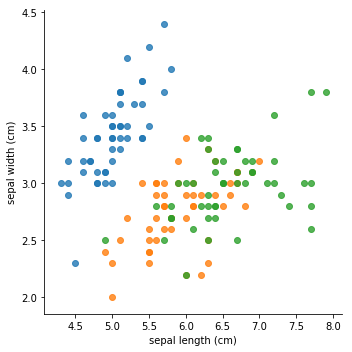

In [118]:
# Plot iris
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['true_labels'] = iris.target
df['svm_labels'] = predicted

hue_labels = "true_labels" # The ground truth
# hue_labels = "svm_labels" # Predicted
svm_plot = sns.lmplot(data=df, x='sepal length (cm)', y='sepal width (cm)',
                      fit_reg=False, legend=False, hue=hue_labels);

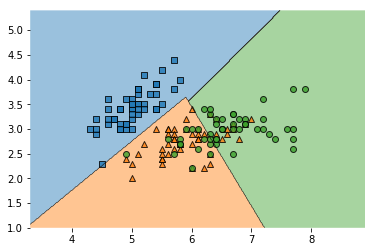

In [121]:
# Plot the decision bounds
from mlxtend.plotting import plot_decision_regions

y_labels = y # actual
# y_labels = predicted
plot_decision_regions(X=X, 
                      y=y_labels, 
                      clf=clf,
                      legend=False);
# NOTE: Linear kernel includes piecewise linear, hence the discontinuity

Case Study: Everyone's favorite… The Iris Dataset
------

<center><img src="images/iris.jpg" width="60%"/></center>

In [115]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:, :2] # Use only the first two features for easier plotting
y = iris.target

In [116]:
# Define & fit model
clf = SVC(kernel='linear').fit(X, y)
predicted = clf.predict(iris.data[:, :2])

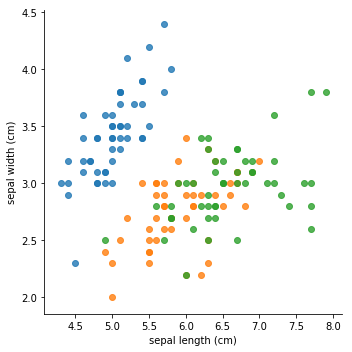

In [118]:
# Plot iris
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['true_labels'] = iris.target
df['svm_labels'] = predicted

hue_labels = "true_labels" # The ground truth
# hue_labels = "svm_labels" # Predicted
svm_plot = sns.lmplot(data=df, x='sepal length (cm)', y='sepal width (cm)',
                      fit_reg=False, legend=False, hue=hue_labels);

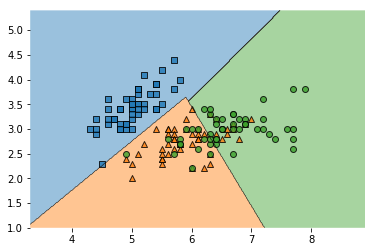

In [121]:
# Plot the decision bounds
from mlxtend.plotting import plot_decision_regions

y_labels = y # actual
# y_labels = predicted
plot_decision_regions(X=X, 
                      y=y_labels, 
                      clf=clf,
                      legend=False);
# NOTE: Linear kernel includes piecewise linear, hence the discontinuity

### Check for understanding

What are the support vectors in this example?

In [122]:
print(f"The number of support vectors: {clf.support_vectors_.shape[0]}")
print()
print('Examples of support vectors:')
print(*clf.support_vectors_[:5], sep='\n')

The number of support vectors: 81

Examples of support vectors:
[4.9 3. ]
[5.7 3.8]
[5.4 3.4]
[5. 3.]
[5.4 3.4]


SVM Summary
------

<center><img src="https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/02/Margin.png" width="75%"/></center>

Source: https://www.hackerearth.com/blog/machine-learning/simple-tutorial-svm-parameter-tuning-python-r/

Why are SVMs useful?
-----

- Theoretically guaranteed (convex optimization) to find globally optimal solution.

- Fast at inference step because of vectorization.

- Model performance only depends on Support Vectors.
    - A low bias algorithm on small data and large data 
    - Handles class imbalances

When should you NOT use SVMs?
-----

- Need state-of-the-art performance (Use Deep Learning).
- Slow to train. 
- Noisier datasets that have overlapping classes have unstable estimates.
- Sensitive to regularization and kernel choices.

SVM Formalism
-----

<center><img src="images/formalism_2.png" width="500"/></center>

<center><img src="images/formalism_3.png" width="500"/></center>

SVM is a convex optimization problem.

Further Study
------

- Explore the math more deeply
- Extensions
- Soft Margin

Explore the math behind SVM
------

- [Technical overview](http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf)
- [Convex optimization](http://web.stanford.edu/~boyd/papers/cvx_short_course.html)
- [The Elements of Statistical Learning](http://www.springer.com/us/book/9780387848570) 
- [svm-tutorial.com](https://www.svm-tutorial.com/)

Extensions
----

- [Regression](https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html?requestedDomain=true)
- [Anomaly Detection](http://activisiongamescience.github.io/2015/12/23/Unsupervised-Anomaly-Detection-SOD-vs-One-class-SVM/)
- [Learning-to-rank](https://en.wikipedia.org/wiki/Learning_to_rank)

<center><img src="images/soft.jpg" width="75%"/></center>

The soft margin SVM gives more flexibility by allowing some of the training points to be misclassified. 

In addition to handling non-separable training sets, it also can be more robust to outliers or mislabeled data.

Summary
------

<center><img src="images/mug.png" width="45%"/></center>

- SVMs are a supervised learning that learn only a linear decision bound.
- SVMs find the optimal hyperplane that maximums the margin between support vectors.
- SVMs used to be very popular. But they are no long STOTA, they have been replaced by Deep Learning.
- They have simple intuition and elegant math.

Bonus Material
----

Slack Variables (Not the messaging app)
-----

There is a hyper-parameter C is the regularization parameter that controls the trade-off between the slack variable penalty (misclassifications) and width of the margin.



[Without slack variables the SVM would be forced into always fitting the data exactly and would often overfit as a result.](https://www.quora.com/What-is-the-purpose-for-using-slack-variable-in-SVM) 

Gamma Hyper-parameter
------

Defines how far the influence of a single training set reaches

Low gamma means far way points impact the decision bound

High gamma means only nearby points impact the decision bound

[Interactive SVM demo](https://cs.stanford.edu/people/karpathy/svmjs/demo/)

- Implement your own SVM classifier. [Example](http://tullo.ch/articles/svm-py/)

hinge loss function
------

<center><img src="https://www.researchgate.net/profile/Haoran_Xie/publication/286920509/figure/fig3/AS:306761400635395@1450149025079/The-hinge-loss-function.png" width="75%"/></center>

For data on the wrong side of the margin, the function's value is proportional to the distance from the margin.
Read more [here](https://stats.stackexchange.com/questions/74499/what-is-the-loss-function-of-hard-margin-svm)

<br>
<br> 
<br>

----